In [1]:
import networkx as nx
import pandas as pd
from pylab import *
%matplotlib inline
import numpy as np

In [2]:
fh = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/Drivers_type_role.tsv", skiprows=7, sep="\t")
fh.head()

geneHGNCsymbol Driver_type              Role OncodriveROLE_prob
0           ABL1      FUSION        Activating                NaN
1           ABL2    MUTATION        Activating              0.811
2          ACACA    MUTATION        Activating             0.7815
3          ACAD8    MUTATION        Activating              0.734
4           ACO1    MUTATION  Loss of function              0.254

In [3]:
fh = fh[["geneHGNCsymbol", "Role"]]
fh

geneHGNCsymbol              Role
0             ABL1        Activating
1             ABL2        Activating
2            ACACA        Activating
3            ACAD8        Activating
4             ACO1  Loss of function
5            ACSL3          No class
6            ACSL6  Loss of function
7             ACTB        Activating
8            ACTG1        Activating
9            ACTG2        Activating
10          ACVR1B  Loss of function
11          ACVR2A  Loss of function
12          ADAM10        Activating
13           ADCY1        Activating
14            AFF4          No class
15          AHCTF1          No class
16           AHNAK        Activating
17             AHR        Activating
18           AKAP9          No class
19            AKT1        Activating
20            AKT3        Activating
21             ALK        Activating
22             ALK        Activating
23            ANK3        Activating
24           APAF1  Loss of function
25             APC  Loss of function
26             AQR        Activating
27           ARAP3  Loss of function
28         ARFGAP1          No class
29         ARFGAP3  Loss of function
..             ...               ...
468        TP53BP1  Loss of function
469         TRERF1        Activating
470           TRIO        Activating
471         TRIP10        Activating
472           TSC1  Loss of function
473          TXNIP        Activating
474          U2AF1        Activating
475          UPF3B  Loss of function
476           USP6          No class
477            VHL  Loss of function
478            VIM          No class
479          WASF3          No class
480          WHSC1          No class
481        WHSC1L1  Loss of function
482          WIPF1        Activating
483           WNK1          No class
484          WNT5A        Activating
485            WT1  Loss of function
486           XPO1          No class
487           XRN1          No class
488           YBX1        Activating
489        ZC3H11A          No class
490          ZFHX3  Loss of function
491        ZFP36L1  Loss of function
492        ZFP36L2  Loss of function
493          ZMYM2  Loss of function
494         ZNF292  Loss of function
495         ZNF638          No class
496         ZNF750  Loss of function
497         ZNF814        Activating

[498 rows x 2 columns]

In [4]:
dl = []
for idx,row in fh.iterrows():
    dl.append(row["geneHGNCsymbol"])

In [5]:
len(dl)

498

In [6]:
ts = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/table4onc.txt", sep="\t")
ts.head()

Genesymbol              miRNA              Cancertype Targetsiteclass
0      4-Mar   hsa-miR-1273g-3p                    Lung       Disrupted
1      4-Mar  hsa-miR-181a-2-3p                    Lung       Disrupted
2      4-Mar       hsa-miR-5092                    Lung       Disrupted
3      3-Sep       hsa-miR-3154  Small cell lung cancer       Disrupted
4      3-Sep       hsa-miR-4428  Small cell lung cancer         Created

In [7]:
len(ts)

112626

In [202]:
test = []
for idx,row in ts.iterrows():
    print idx, "\r",
    if row["Genesymbol"] in test:
        continue
    if row["Genesymbol"] in dl:
        test.append(row["Genesymbol"])
set(dl) - set(test)

{'ACAD8',
 'ACTB',
 'ACTG1',
 'ACTG2',
 'ACVR1B',
 'ACVR2A',
 'ADAM10',
 'AHCTF1',
 'AKAP9',
 'ALK',
 'ANK3',
 'AQR',
 'ARAP3',
 'ARFGAP1',
 'ARFGAP3',
 'ARFGEF1',
 'ARHGAP29',
 'ARHGEF2',
 'ARID1B',
 'ARID2',
 'ARID4B',
 'ARNTL',
 'ASPM',
 'ASXL1',
 'ATF1',
 'ATIC',
 'ATP6AP2',
 'ATR',
 'AXIN1',
 'AXIN2',
 'B2M',
 'BAP1',
 'BCOR',
 'BLM',
 'BMPR2',
 'BRAF',
 'BRCA1',
 'BRCA2',
 'C15orf55',
 'CAD',
 'CARM1',
 'CBFB',
 'CCND1',
 'CCND3',
 'CCNE1',
 'CCT5',
 'CDH1',
 'CDK12',
 'CEP290',
 'CHD1L',
 'CHD4',
 'CHD6',
 'CHD9',
 'CHEK2',
 'CIITA',
 'CLASP2',
 'CLSPN',
 'CLTC',
 'CNOT1',
 'CNOT3',
 'CNTNAP1',
 'COL1A1',
 'CSDA',
 'CSDE1',
 'CSNK2A1',
 'CTNND1',
 'CTTN',
 'CUL1',
 'CYTH4',
 'DDX3X',
 'DDX5',
 'DHX15',
 'DHX9',
 'DICER1',
 'DNMT3A',
 'EEF1B2',
 'EIF2AK3',
 'EIF2C3',
 'EIF4G1',
 'ELF1',
 'ELF3',
 'EPC1',
 'EPHA1',
 'EPHA2',
 'EPHA4',
 'ERBB2',
 'ERCC2',
 'EZH2',
 'F8',
 'FAM123B',
 'FIP1L1',
 'FMR1',
 'FOXA1',
 'FOXA2',
 'FRG1',
 'FUS',
 'G3BP1',
 'GNA11',
 'GOLGA5',
 'GPS2',
 'H

In [203]:
test

['AKT1',
 'ARHGAP26',
 'BRWD1',
 'CDK6',
 'CHD3',
 'CSNK1G3',
 'FCRL4',
 'MYH11',
 'PIK3C2B',
 'PLCG1',
 'RASGRP1',
 'SMAD2',
 'SYNCRIP',
 'TCF12',
 'ACSL3',
 'ADCY1',
 'AFF4',
 'AHR',
 'ARFGEF2',
 'BCL11A',
 'CRNKL1',
 'CTCF',
 'CYLD',
 'EGFR',
 'EIF1AX',
 'EP300',
 'FGFR2',
 'FUBP1',
 'G3BP2',
 'IGF1R',
 'KALRN',
 'LRP6',
 'MLH3',
 'MSR1',
 'NF2',
 'NTRK2',
 'PIK3R3',
 'PTGS1',
 'SCAI',
 'SMAD4',
 'SMC1A',
 'SOX17',
 'STARD13',
 'SUZ12',
 'SVEP1',
 'TP53',
 'ZMYM2',
 'ABL2',
 'BPTF',
 'FGFR1',
 'IRS2',
 'MDM4',
 'MUC20',
 'NR2F2',
 'RASA1',
 'TOM1',
 'EPHB2',
 'HNF1A',
 'ERBB3',
 'LPHN2',
 'PRKCZ',
 'HLA-A',
 'CCAR1',
 'AURKA',
 'CHD8',
 'CNOT4',
 'MECOM',
 'MAGI2',
 'SOX9',
 'CUL2',
 'VHL',
 'ACO1',
 'NTRK3',
 'BCLAF1',
 'FBXW7',
 'GNAS',
 'CAT',
 'BNC2',
 'EIF4A2',
 'MYD88',
 'PRRX1',
 'THRAP3',
 'FANCI',
 'ATRX',
 'MAP2K4',
 'MET',
 'MCM8',
 'MCM3',
 'EFTUD2',
 'FAS',
 'TCF4',
 'EEF1A1',
 'NCKAP1',
 'SH2B3',
 'MED17',
 'DHX35',
 'CDKN2A',
 'SHMT1',
 'KEAP1',
 'TJP1',
 'FXR1',
 'AT

In [204]:
test1=[]
test2=[]
test3=[]
for item in test:
    for idx,row in fh.iterrows():
        if row["geneHGNCsymbol"] in test1:
            continue
        if row["geneHGNCsymbol"] in test2:
            continue
        if row["geneHGNCsymbol"] in test3:
            continue
        if row["geneHGNCsymbol"] != item:
            continue
        if row["Role"] == "Activating":
            test1.append(row["geneHGNCsymbol"])
        elif row["Role"] == "Loss of function":
            test2.append(row["geneHGNCsymbol"])
        elif row["Role"] == "No class":
            test3.append(row["geneHGNCsymbol"])

In [205]:
len(test1)

89

In [206]:
len(test2)

107

In [207]:
len(test3)

42

In [14]:
d1 = {}
d2 = {}
d3 = {}
for idx,row in ts.iterrows():
    if row["Genesymbol"] in test1:
        d1[row["miRNA"]] = []
    if row["Genesymbol"] in test2:
        d2[row["miRNA"]] = []
    if row["Genesymbol"] in test3:
        d3[row["miRNA"]] = []
for idx,row in ts.iterrows():
    if not row["Genesymbol"] in test:
        continue
    if row["Targetsiteclass"] == "Disrupted":
        if row["Genesymbol"] in test1:
            if row["Genesymbol"] in d1[row["miRNA"]]:
                continue
            d1[row["miRNA"]].append(row["Genesymbol"])
    if row["Targetsiteclass"] == "Created":
        if row["Genesymbol"] in test2:
            if row["Genesymbol"] in d2[row["miRNA"]]:
                continue
            d2[row["miRNA"]].append(row["Genesymbol"])
    elif row["Genesymbol"] in test3:
        if row["Genesymbol"] in d3[row["miRNA"]]:
            continue
        d3[row["miRNA"]].append(row["Genesymbol"])

In [15]:
t4o = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/table4onc.txt", sep= "\t")
t4o.head()

Genesymbol              miRNA              Cancertype Targetsiteclass
0      4-Mar   hsa-miR-1273g-3p                    Lung       Disrupted
1      4-Mar  hsa-miR-181a-2-3p                    Lung       Disrupted
2      4-Mar       hsa-miR-5092                    Lung       Disrupted
3      3-Sep       hsa-miR-3154  Small cell lung cancer       Disrupted
4      3-Sep       hsa-miR-4428  Small cell lung cancer         Created

In [216]:
d = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_gene_counts3.txt", sep="\t")
d.head()

Unnamed: 0 Driver Oncogenes with Mutated Binding Site  \
0     hsa-miR-4530           MET,MED17,ZNF814,FKBP5,SIN3A,AHR   
1  hsa-miR-3613-3p                               PGR,MET,TCF4   
2  hsa-miR-4733-5p                      SIN3A,MED17,MET,FKBP5   
3     hsa-miR-3148                                       PAX5   
4      hsa-miR-495                                  AHR,KAT6B   

  Driver Tumor Suppressor Gene with Mutated Binding Site  \
0                             APAF1,ACSL6,NF2,EEF1A1       
1                          SMAD2,GNG2,VHL,TET2,FUBP1       
2                             ACSL6,APAF1,EEF1A1,VHL       
3                          FUBP1,TP53,TOM1,MLL3,MSR1       
4                                    MLH3,CCAR1,TJP1       

  Unclassified Driver Gene with Mutated Binding Site  \
0                                         WHSC1,STK4   
1                                              WASF3   
2                                                NaN   
3                                                NaN   
4                                            PIK3C2B   

   Total # Mutated Driver Gene Binding Sites  
0                                         12  
1                                          9  
2                                          8  
3                                          6  
4                                          6

In [217]:
d = d.rename(columns = {"Unnamed: 0": "miRNA"})

In [215]:
d

miRNA Driver Oncogenes with Mutated Binding Site  \
0      hsa-miR-4530           MET,MED17,ZNF814,FKBP5,SIN3A,AHR   
1   hsa-miR-3613-3p                               PGR,MET,TCF4   
2   hsa-miR-4733-5p                      SIN3A,MED17,MET,FKBP5   
3      hsa-miR-3148                                       PAX5   
4       hsa-miR-495                                  AHR,KAT6B   
5    hsa-miR-7-1-3p                             AHR,KAT6B,LRP6   
6    hsa-miR-7-2-3p                             AHR,LRP6,KAT6B   
7   hsa-miR-106b-5p                                        AHR   
8    hsa-miR-150-5p                              AHR,ABL2,NRAS   
9     hsa-miR-17-5p                                        AHR   
10   hsa-miR-186-3p                                        AHR   
11   hsa-miR-20a-5p                                        AHR   
12   hsa-miR-20b-5p                                        AHR   
13  hsa-miR-302a-5p                           G3BP2,NTRK2,MCM8   
14     hsa-miR-3652                                      LPHN2   
15     hsa-miR-4430                                      LPHN2   
16  hsa-miR-4668-3p              EGFR,SCAI,SRGAP1,NTRK2,BCL11A   
17  hsa-miR-4684-5p                                       KRAS   
18  hsa-miR-4728-5p                                      SIN3A   
19  hsa-miR-4768-3p                        CLCC1,ZNF814,POM121   
20     hsa-miR-5095                                      NTRK2   
21  hsa-miR-518a-5p                           LRP6,KALRN,FGFR3   
22     hsa-miR-519d                                        AHR   
23      hsa-miR-527                           LRP6,KALRN,FGFR3   
24   hsa-miR-532-5p                                        NaN   
25     hsa-miR-5688                                  AHR,KAT6B   
26   hsa-miR-589-3p                                  LPHN2,KDR   
27    hsa-miR-93-5p                                        AHR   

   Driver Tumor Suppressor Gene with Mutated Binding Site  \
0                              APAF1,ACSL6,NF2,EEF1A1       
1                           SMAD2,GNG2,VHL,TET2,FUBP1       
2                              ACSL6,APAF1,EEF1A1,VHL       
3                           FUBP1,TP53,TOM1,MLL3,MSR1       
4                                     MLH3,CCAR1,TJP1       
5                                          CCAR1,TJP1       
6                                          CCAR1,TJP1       
7                                                 MLL       
8                                                 NaN       
9                                                 MLL       
10                                               CTCF       
11                                                MLL       
12                                                MLL       
13                                                FAS       
14                                         MUC20,FAF1       
15                                         MUC20,FAF1       
16                                                NaN       
17                                     ARHGAP26,PTGS1       
18                              CIC,TFDP2,ACSL6,CLOCK       
19                                      EEF1A1,INPPL1       
20                        ARHGAP26,CDC27,RAD23B,TFDP2       
21                                     ERBB2IP,RAD23B       
22                                                MLL       
23                                     ERBB2IP,RAD23B       
24                            MUC20,CUL2,EEF1A1,HLA-A       
25                                          MLH3,TJP1       
26                                        COPS2,MED23       
27                                                MLL       

   Unclassified Driver Gene with Mutated Binding Site  \
0                                          WHSC1,STK4   
1                                               WASF3   
2                                                 NaN   
3                                                 NaN   
4                                           

In [220]:
h = []
for idx,row in d.iterrows():
    h.append(row["miRNA"])

In [222]:
dt4o = pd.DataFrame(columns = ["Genesymbol", "miRNA", "Targetsiteclass", "Cancertype"])
for idx,row in t4o.iterrows():
    if not row["miRNA"] in h:
        continue
    if row["Genesymbol"] in test1:
        dt4o.loc[idx] = t4o.loc[idx]
    elif row["Genesymbol"] in test2:
        dt4o.loc[idx] = t4o.loc[idx]
    elif row["Genesymbol"] in test3:
        dt4o.loc[idx] = t4o.loc[idx]

In [ ]:
dt4o = dt4o.drop_duplicates()

In [223]:
len(dt4o)

5051

In [190]:
dt4o.to_csv("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_for_network9.txt", sep = "\t")

In [180]:
q = pd.read_table("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_for_network6.txt", sep = "\t")
q = q.rename(columns = {"Unnamed: 0": "miRNA"})
q.head()

miRNA Genesymbol
0    hsa-miR-548ac       AKT1
1  hsa-miR-548h-3p       AKT1
2     hsa-miR-548z       AKT1
3  hsa-miR-548d-3p       AKT1
4    hsa-miR-548aa       AKT1

In [181]:
from collections import Counter
y= Counter()
for idx,row in q.iterrows():
    y[row["Genesymbol"]] += 1

In [182]:
for key,val in y.items():
    if val < 15:
        del y[key]

In [183]:
r = pd.DataFrame(columns=["miRNA", "Genesymbol"])
for idx,row in q.iterrows():
    if row["Genesymbol"] in y.keys():
        r.loc[idx] = q.loc[idx]

In [184]:
len(r)

167

In [84]:
r.to_csv("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/topdgenes.txt", sep="\t")

In [191]:
G = nx.read_edgelist("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/driver_for_network10.txt", delimiter = "\t", create_using=nx.DiGraph())
G.remove_edge("miRNA", "Genesymbol")

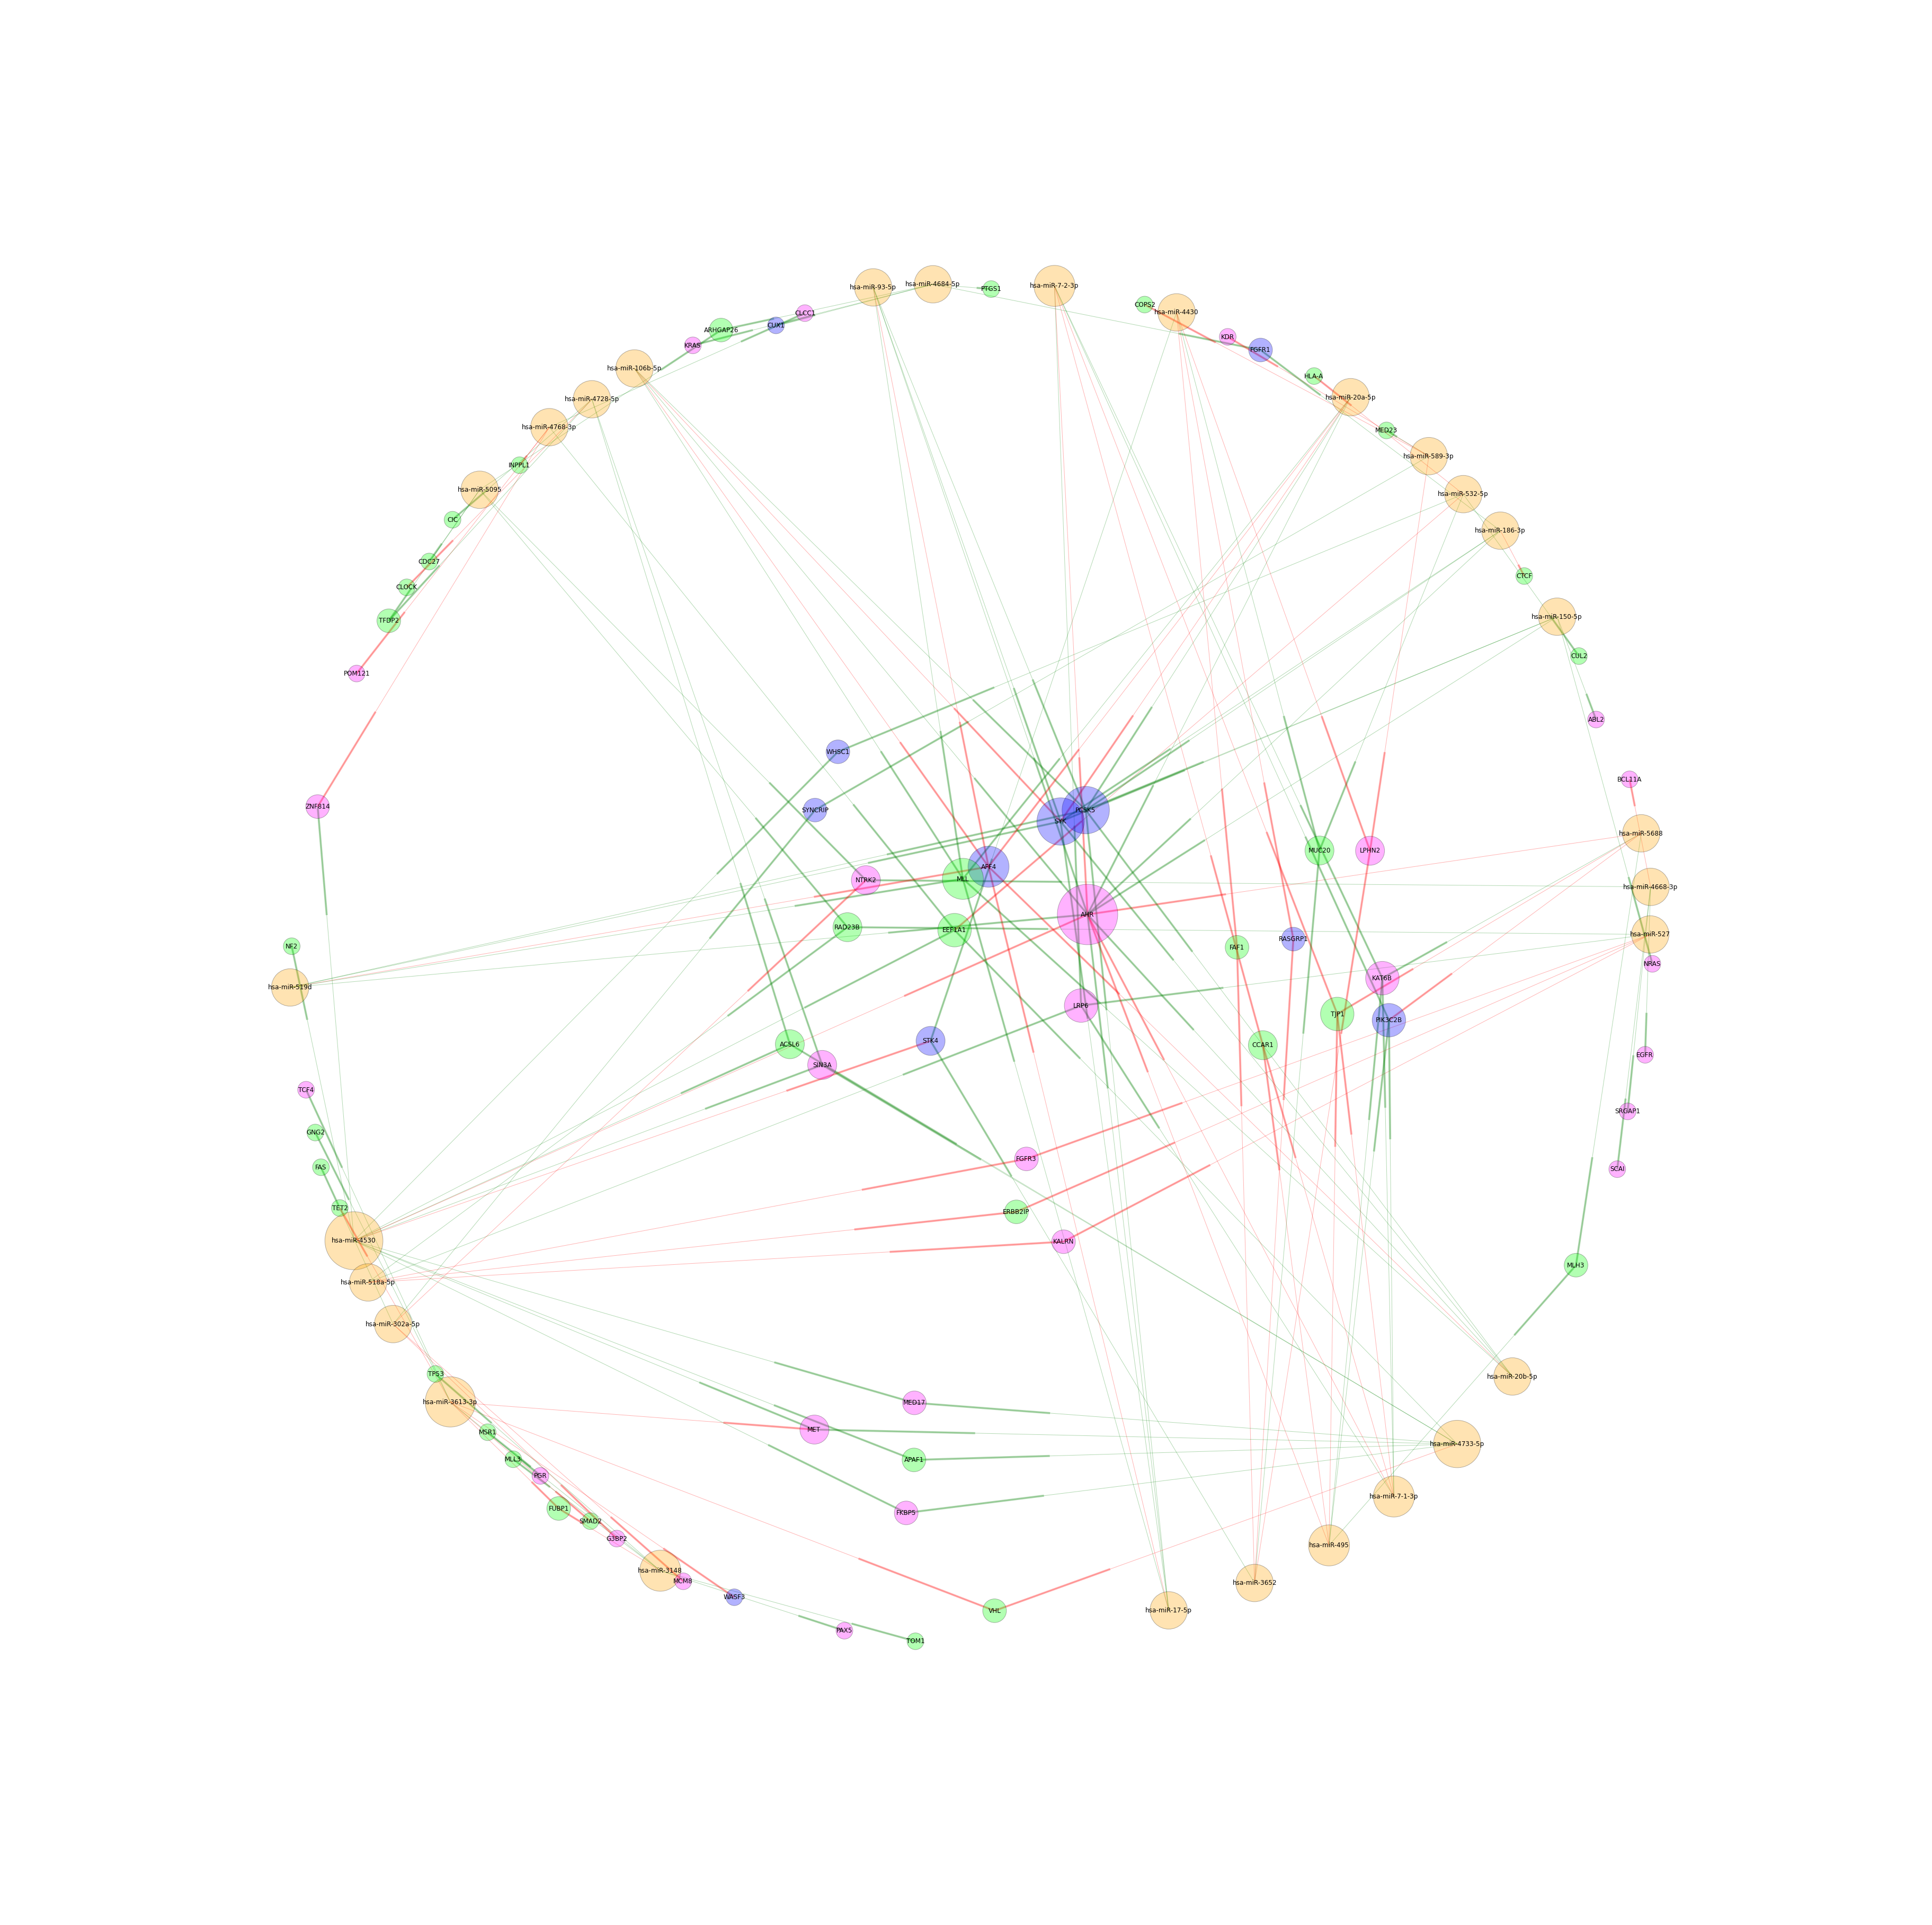

In [192]:
hey = 0
colors2 = []
colors=[]
mirs = []
size = []
for idx,row in dt4o.iterrows():
    if row["miRNA"] in mirs:
        continue
    mirs.append(row["miRNA"])
targets = []
for item in mirs:
    targets += G.neighbors(item)
fhb = t4o[t4o["miRNA"].isin(mirs)]
g = G.subgraph(mirs + targets)
for j,k in g.edges():
    test0 = []
    hey += 1
    print hey, '\r',
    for idx,row in fhb.iterrows():
        if not row["miRNA"] == j:
            continue
        if not row["Genesymbol"] == k:
            continue
        if row["Genesymbol"] in test0:
            continue
        test0.append(row["Genesymbol"])
        if row["Targetsiteclass"] == "Created":
            colors2.append("g")
        else:
            colors2.append("r")
for n in g.nodes():
    size.append(1000 * g.degree(n))
    if n in mirs:
        colors.append("orange")
    elif n in test1:
        colors.append("fuchsia")
    elif n in test2:
        colors.append("lime")
    else:
        colors.append("b")
figure(figsize=(50,50))
nx.draw(g, node_size = size, node_color=colors, alpha=.3, with_labels=True, edge_color=colors2)

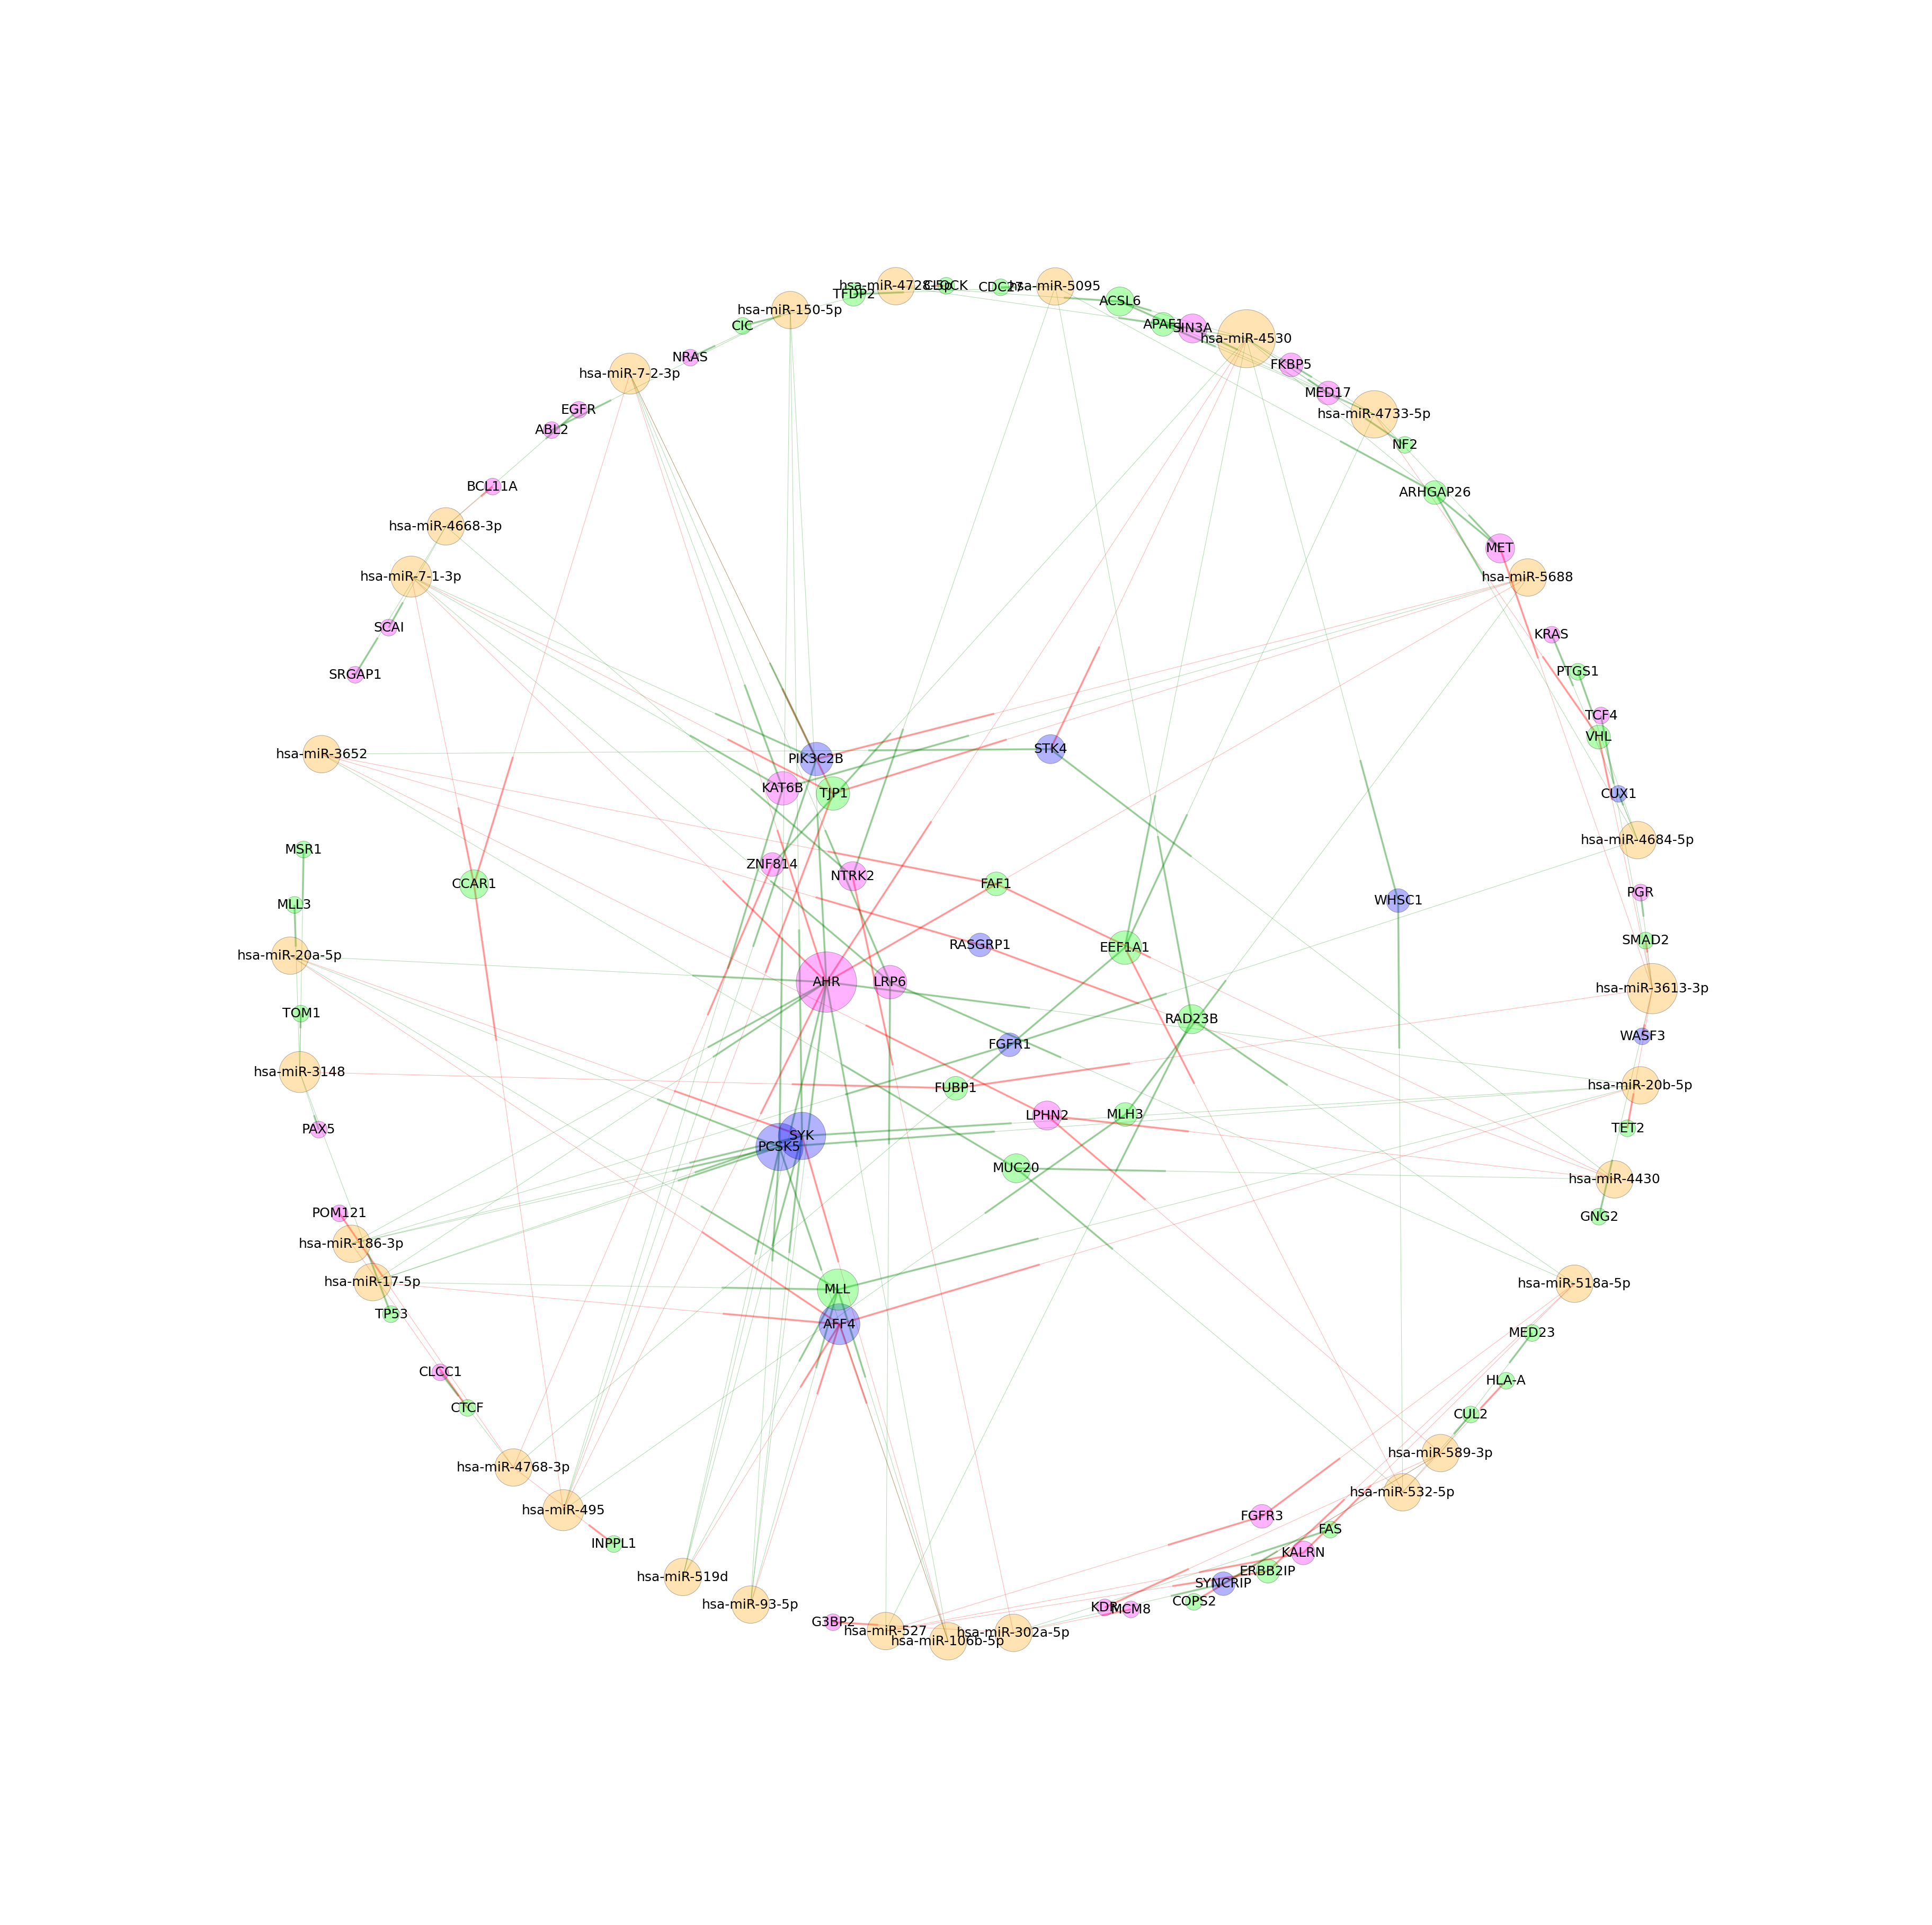

In [195]:
figure(figsize=(50,50))
nx.draw(g, node_size = size, node_color=colors, alpha=.3, with_labels=True, edge_color=colors2, font_size=25)

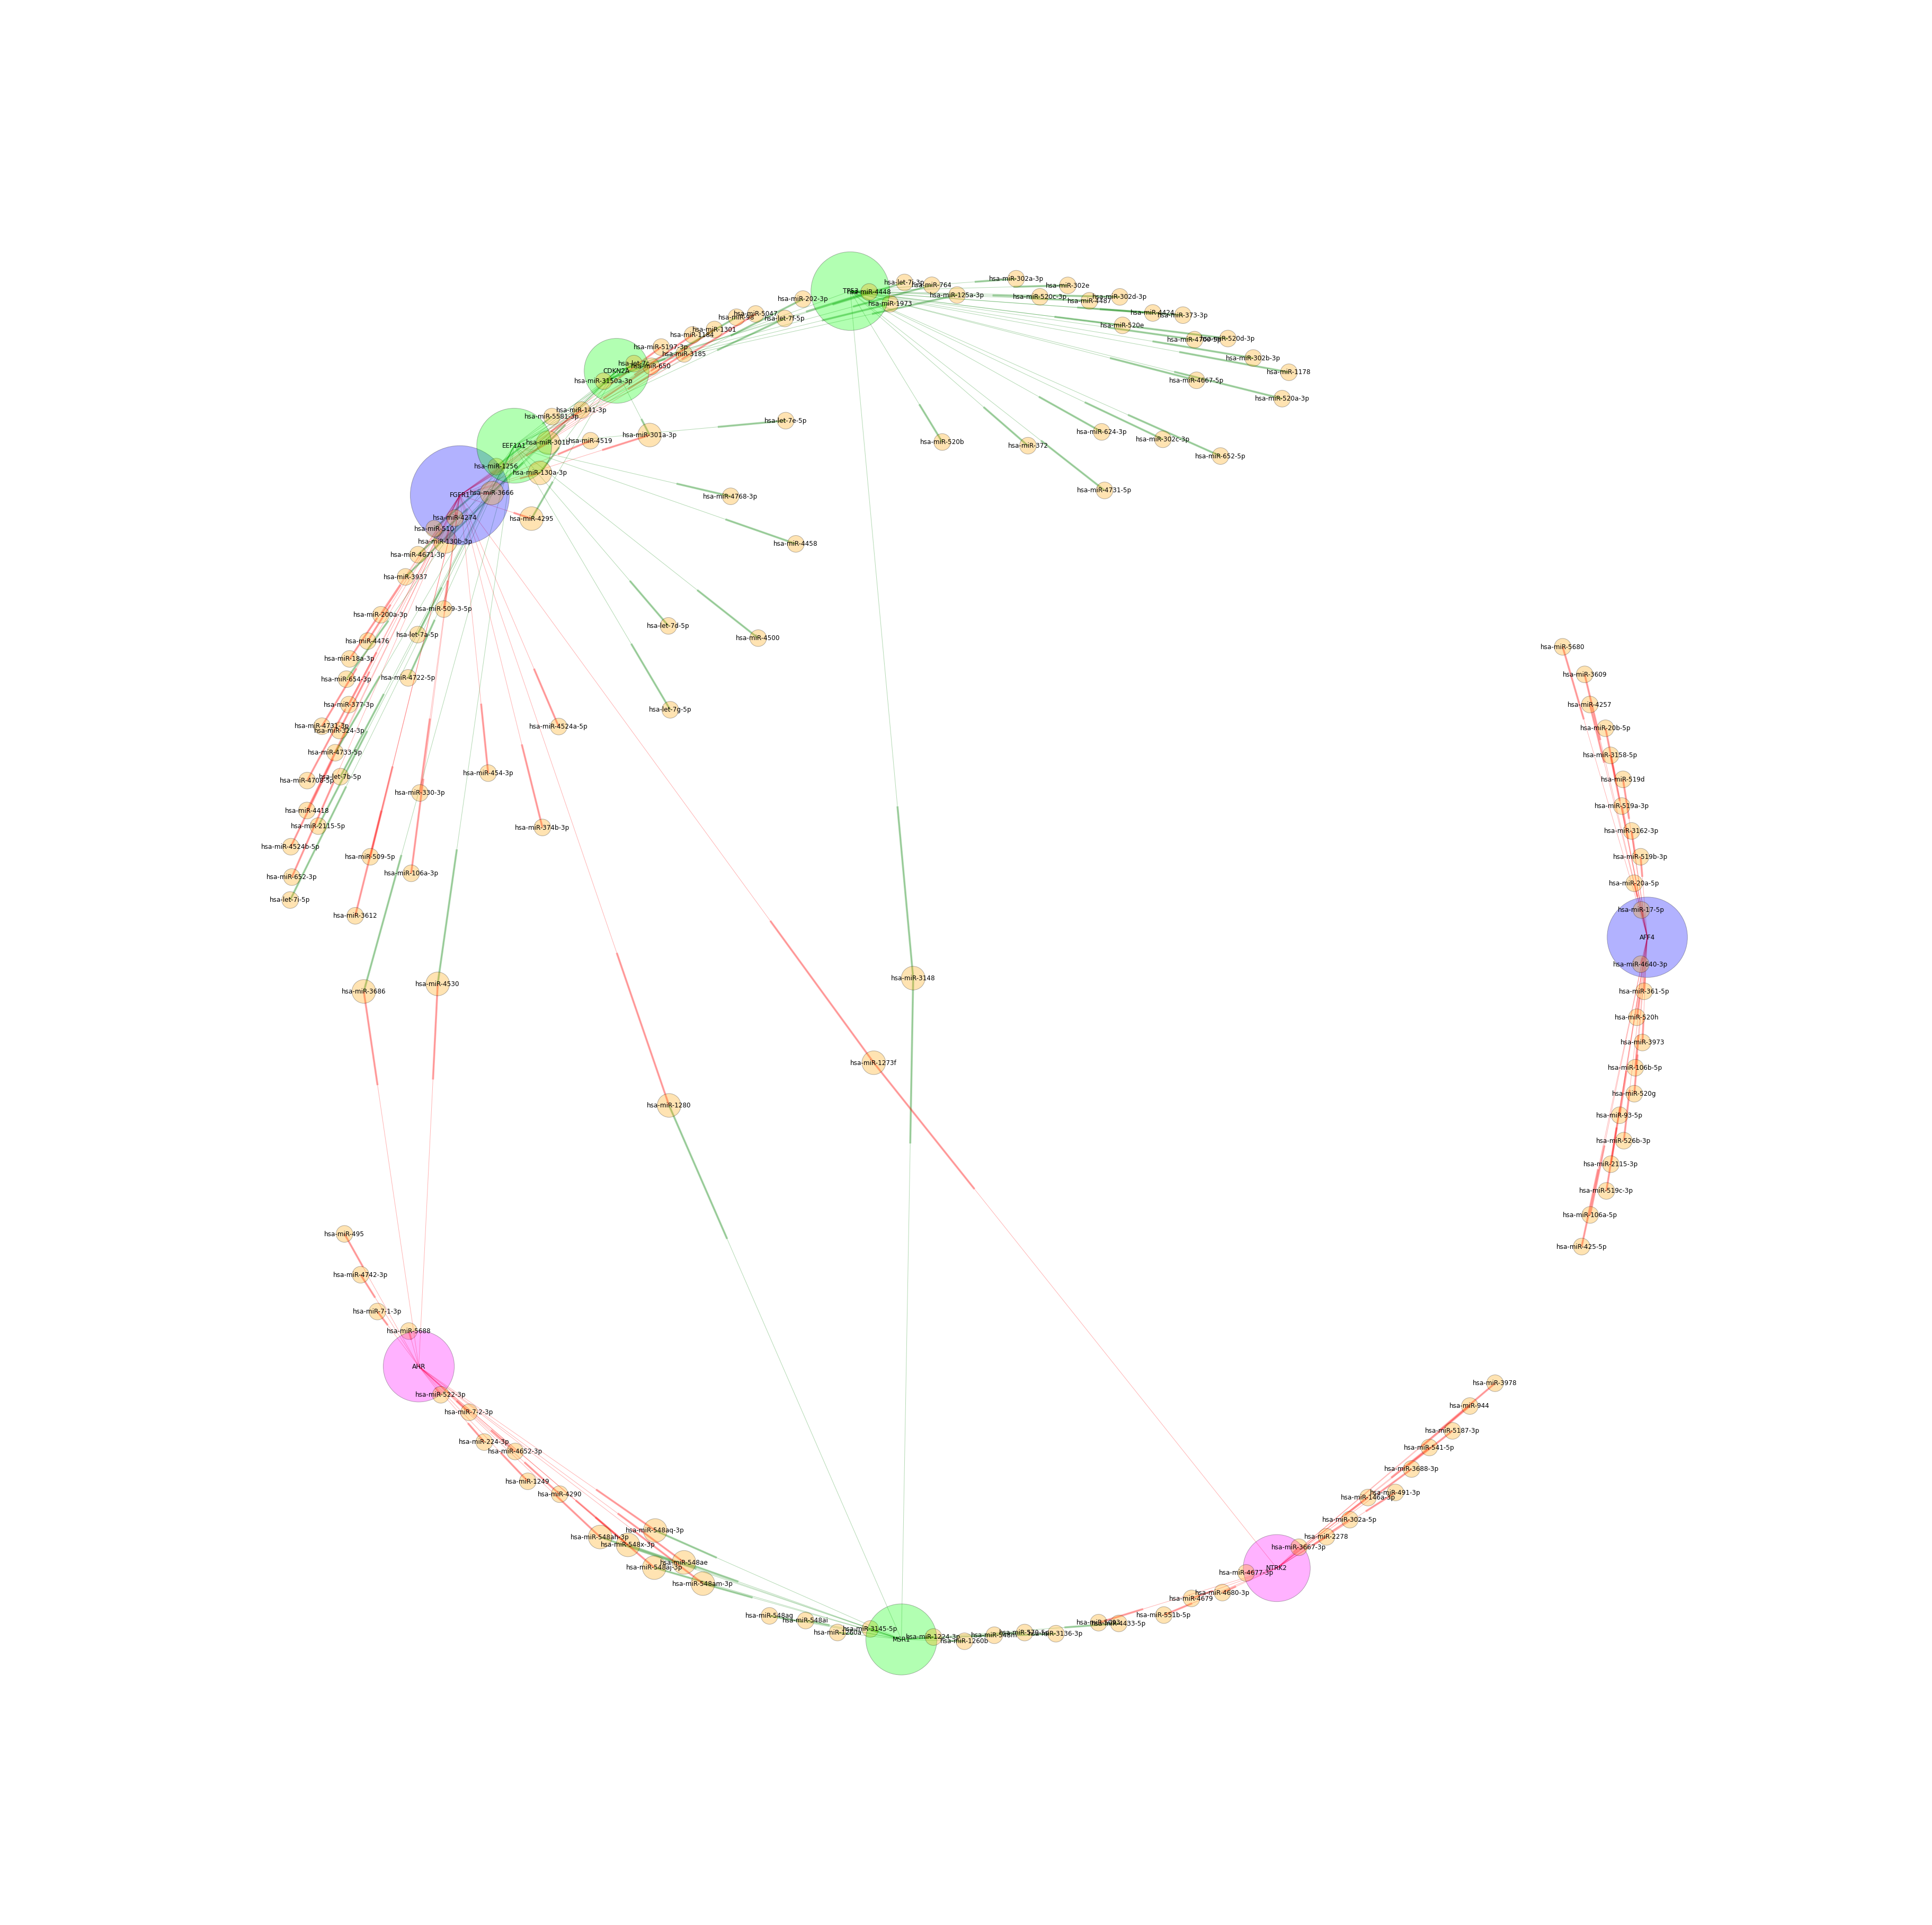

In [89]:
K = nx.read_edgelist("C:/Users/jtso/My Documents/Cancer miRNA rewiring project/topdgenes3.txt", delimiter = "\t", create_using=nx.DiGraph())
K.remove_edge("Genesymbol", "miRNA")
hey = 0
colors2 = []
colors=[]
genes = []
size = []
for idx,row in r.iterrows():
    if row["Genesymbol"] in genes:
        continue
    genes.append(row["Genesymbol"])
targets = []
for item in genes:
    targets += K.neighbors(item)
fhb = t4o[t4o["Genesymbol"].isin(genes)]
k = K.subgraph(genes + targets)
for h,i in k.edges():
    test = []
    hey += 1
    print hey, '\r',
    for idx,row in fhb.iterrows():
        if not row["miRNA"] == i:
            continue
        if not row["Genesymbol"] == h:
            continue
        if row["miRNA"] in test:
            continue
        test.append(row["miRNA"])
        if row["Targetsiteclass"] == "Created":
            colors2.append("g")
        else:
            colors2.append("r")
for n in k.nodes():
    size.append(1000 * k.degree(n))
    if n in mirs:
        colors.append("orange")
    elif n in test1:
        colors.append("fuchsia")
    elif n in test2:
        colors.append("lime")
    else:
        colors.append("b")
figure(figsize=(50,50))
nx.draw(k, node_size = size, node_color=colors, alpha=.3, with_labels=True, edge_color=colors2)

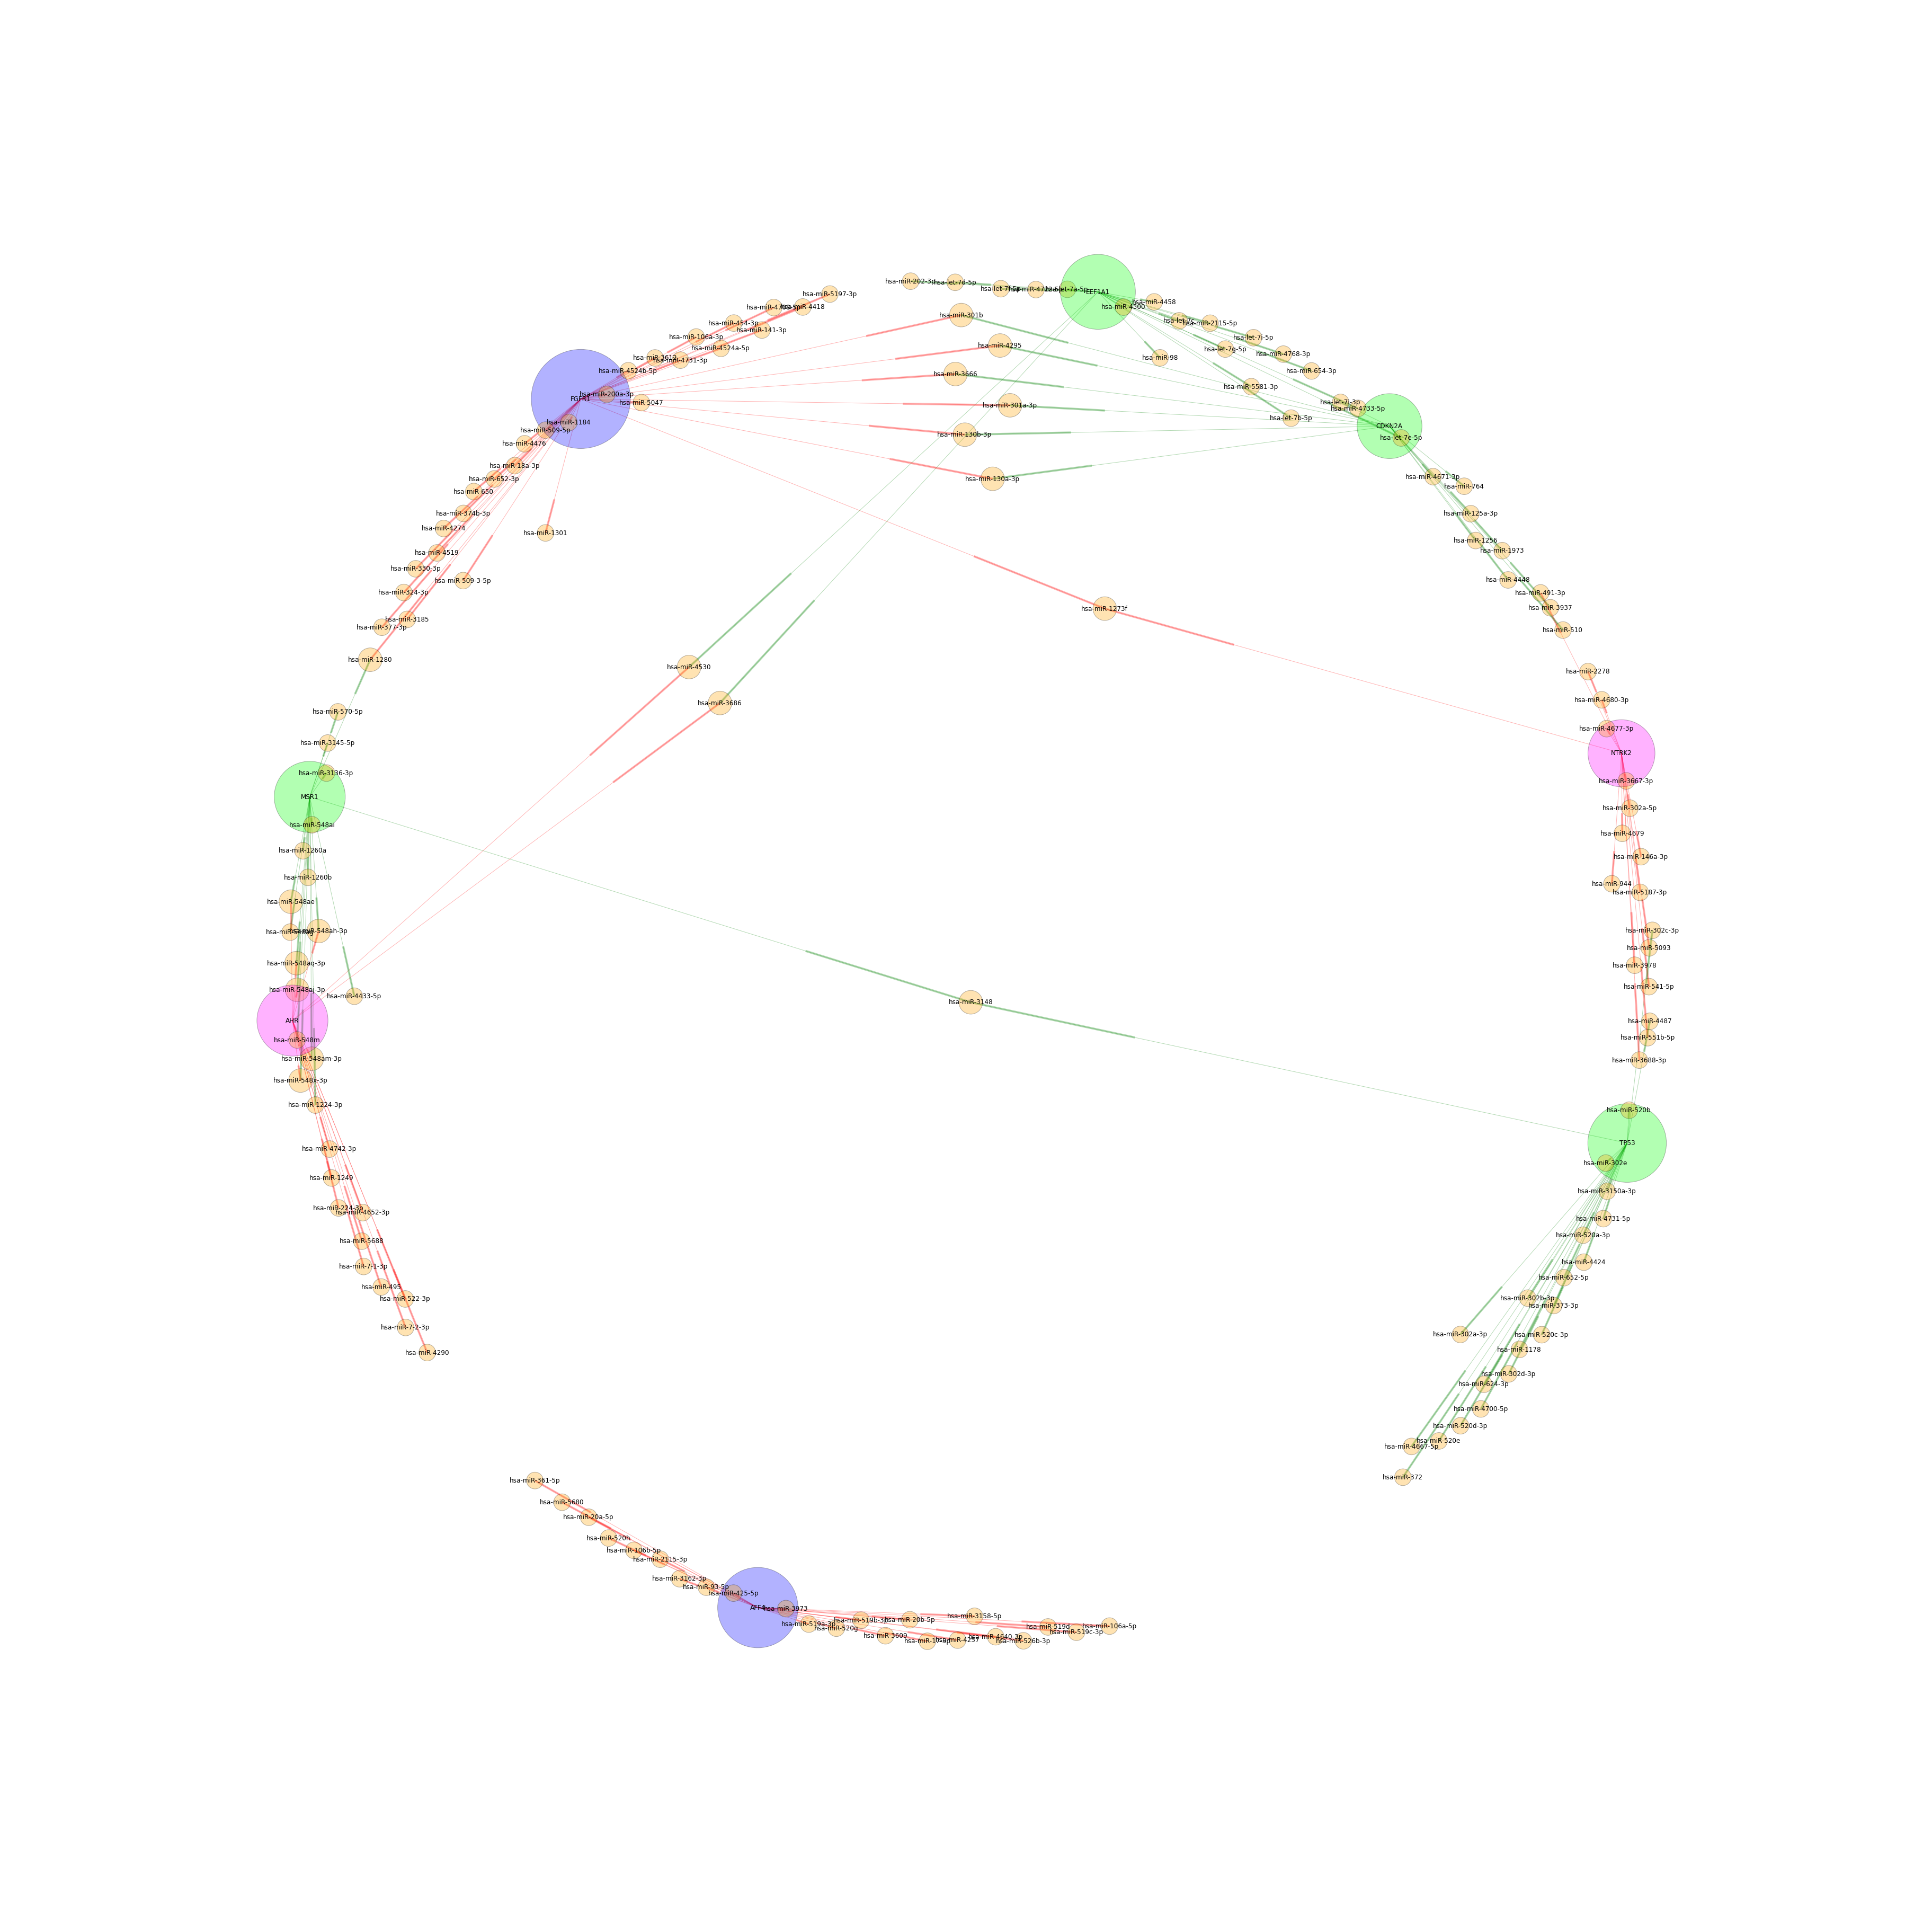

In [98]:
figure(figsize=(50,50))
nx.draw(k, node_size = size, node_color=colors, alpha=.3, with_labels=True, edge_color=colors2)

In [99]:
test3

['FCRL4',
 'PIK3C2B',
 'RASGRP1',
 'SYNCRIP',
 'ACSL3',
 'AFF4',
 'SVEP1',
 'FGFR1',
 'PRKCZ',
 'CNOT4',
 'MAGI2',
 'MYD88',
 'FANCI',
 'EFTUD2',
 'SH2B3',
 'SHMT1',
 'PCSK5',
 'VIM',
 'CRTC3',
 'WHSC1',
 'SYK',
 'ARID4A',
 'WNK1',
 'JMY',
 'STK4',
 'FAM46C',
 'XRN1',
 'PIP5K1A',
 'CUX1',
 'IRF6',
 'WASF3',
 'TNPO1',
 'PTCH1',
 'CDC73',
 'RGS3',
 'SPOP',
 'MYC',
 'CAPN7',
 'FBXO11',
 'CDK4',
 'MED24',
 'SMURF2']

In [93]:
fhb

Empty DataFrame
Columns: [Genesymbol, miRNA, Cancertype, Targetsiteclass]
Index: []

In [300]:
d1

{'hsa-let-7f-2-3p': ['NRAS'],
 'hsa-let-7i-3p': ['RAF1'],
 'hsa-miR-100-3p': [],
 'hsa-miR-101-3p': ['PLCG1'],
 'hsa-miR-103a-2-5p': ['POM121'],
 'hsa-miR-103a-3p': ['BRWD1'],
 'hsa-miR-105-5p': ['ARFGEF2'],
 'hsa-miR-106a-3p': ['EIF4G3'],
 'hsa-miR-106a-5p': [],
 'hsa-miR-106b-5p': [],
 'hsa-miR-107': ['BRWD1'],
 'hsa-miR-1178': [],
 'hsa-miR-1185-1-3p': ['NRAS'],
 'hsa-miR-1185-2-3p': ['NRAS'],
 'hsa-miR-1197': ['CLCC1', 'ERBB3'],
 'hsa-miR-1202': ['ABL2', 'TJP2'],
 'hsa-miR-1224-3p': ['PLCG1'],
 'hsa-miR-1226-3p': [],
 'hsa-miR-1227': ['ABL2'],
 'hsa-miR-1228-3p': [],
 'hsa-miR-1228-5p': ['NDRG1'],
 'hsa-miR-1244': [],
 'hsa-miR-1245a': ['FLT3'],
 'hsa-miR-1245b-3p': ['BPTF'],
 'hsa-miR-1246': ['BRWD1'],
 'hsa-miR-1247-5p': [],
 'hsa-miR-1249': ['AHR'],
 'hsa-miR-1252': [],
 'hsa-miR-1254': [],
 'hsa-miR-126-5p': ['CRNKL1'],
 'hsa-miR-1261': [],
 'hsa-miR-1263': [],
 'hsa-miR-1269a': ['NKX3-1'],
 'hsa-miR-1269b': ['NKX3-1'],
 'hsa-miR-1273f': ['NTRK2', 'ERBB3'],
 'hsa-miR-1273g-5p':

In [139]:
d1 = {}
d2 = {}
d3 = {}
for idx,row in ts.iterrows():
    if row["Genesymbol"] in test1:
        d1[row["miRNA"]] = []
    if row["Genesymbol"] in test2:
        d2[row["miRNA"]] = []
    if row["Genesymbol"] in test3:
        d3[row["miRNA"]] = []
for idx,row in ts.iterrows():
    if not row["Genesymbol"] in test:
        continue
    if row["Genesymbol"] in test1:
        if row["Genesymbol"] in d1[row["miRNA"]]:
            continue
        d1[row["miRNA"]].append(row["Genesymbol"])
    elif row["Genesymbol"] in test2:
        if row["Genesymbol"] in d2[row["miRNA"]]:
            continue
        d2[row["miRNA"]].append(row["Genesymbol"])
    elif row["Genesymbol"] in test3:
        if row["Genesymbol"] in d3[row["miRNA"]]:
            continue
        d3[row["miRNA"]].append(row["Genesymbol"])

In [140]:
for key,val in d1.items():
    if d1[key] == []:
        del d1[key]

In [141]:
for key,val in d2.items():
    if d2[key] == []:
        del d2[key]

In [142]:
for key,val in d3.items():
    if d3[key] == []:
        del d3[key]

In [143]:
cd1 = {}
for key,val in d1.items():
    cd1[key] = len(val)

In [144]:
cd2 = {}
for key,val in d2.items():
    cd2[key] = len(val)

In [145]:
cd3 = {}
for key,val in d3.items():
    cd3[key] = len(val)

In [146]:
for key,val in d1.items():
    d1[key] = ",".join(val)

In [147]:
for key,val in d2.items():
    d2[key] = ",".join(val)

In [148]:
for key,val in d3.items():
    d3[key] = ",".join(val)

In [149]:
sd1 = pd.Series(d1)
dfd1 = pd.DataFrame(sd1)

In [150]:
sd2 = pd.Series(d2)
dfd2 = pd.DataFrame(sd2)

In [151]:
sd3 = pd.Series(d3)
dfd3 = pd.DataFrame(sd3)

In [152]:
fd = pd.concat([dfd1,dfd2,dfd3], axis=1)
fd

0                  0               0
hsa-let-7a-2-3p             NaN                FAS             NaN
hsa-let-7a-3p               NaN         NR4A2,TET2             NaN
hsa-let-7a-5p               NaN     TBL1XR1,EEF1A1             NaN
hsa-let-7b-3p               NaN         NR4A2,TET2             NaN
hsa-let-7b-5p               NaN     EEF1A1,TBL1XR1             NaN
hsa-let-7c                  NaN     EEF1A1,TBL1XR1             NaN
hsa-let-7d-5p               NaN     EEF1A1,TBL1XR1             NaN
hsa-let-7e-5p               NaN     TBL1XR1,EEF1A1             NaN
hsa-let-7f-1-3p             NaN         NR4A2,TET2             NaN
hsa-let-7f-2-3p            NRAS                NaN             NaN
hsa-let-7f-5p               NaN     EEF1A1,TBL1XR1             NaN
hsa-let-7g-3p               NaN                FAS             NaN
hsa-let-7g-5p               NaN     TBL1XR1,EEF1A1             NaN
hsa-let-7i-3p              RAF1             CDKN2A             NaN
hsa-let-7i-5p               NaN     EEF1A1,TBL1XR1             NaN
hsa-miR-1                   NaN              SMAD2             NaN
hsa-miR-100-3p             MCM3                NaN            CUX1
hsa-miR-101-3p            PLCG1                NaN             NaN
hsa-miR-103a-2-5p        POM121                FAS             NaN
hsa-miR-103a-3p           BRWD1              CLOCK             NaN
hsa-miR-105-5p          ARFGEF2               LDHA             NaN
hsa-miR-106a-3p    PRRX1,EIF4G3                NaN           FGFR1
hsa-miR-106a-5p             AHR                MLL      PCSK5,AFF4
hsa-miR-106b-5p             AHR                MLL  PCSK5,SYK,AFF4
hsa-miR-107               BRWD1              CLOCK             NaN
hsa-miR-10a-5p              NaN              SMAD2             NaN
hsa-miR-10b-3p              NaN           RTN4,NF1             NaN
hsa-miR-10b-5p              NaN              SMAD2             NaN
hsa-miR-1178             POM121               TP53             NaN
hsa-miR-1181                NaN               SOX9             NaN
...                         ...                ...             ...
hsa-miR-875-3p            LPHN2                NaN             NaN
hsa-miR-875-5p              NaN               TET2           FGFR1
hsa-miR-876-3p             GNAS                NaN             NaN
hsa-miR-876-5p              NaN                NaN           ACSL3
hsa-miR-877-3p           POM121                NaN             NaN
hsa-miR-877-5p              MAX                NaN             NaN
hsa-miR-885-3p             GNAS  CHD3,CLOCK,MAP2K4             NaN
hsa-miR-887                 NaN             PIK3R1             NaN
hsa-miR-888-3p         GNAS,RET                NaN             NaN
hsa-miR-890             STARD13                NaN             NaN
hsa-miR-891a                NaN             NAP1L1             NaN
hsa-miR-920         SOX17,WNT5A                NaN             NaN
hsa-miR-92a-1-5p            NaN                NaN           MYD88
hsa-miR-92a-2-5p            NaN       EP300,TCF7L2             NaN
hsa-miR-92a-3p            MECOM                NaN            STK4
hsa-miR-92b-3p            MECOM                NaN            STK4
hsa-miR-92b-5p              NaN             ARID5B             NaN
hsa-miR-93-3p             AHNAK                NaN             NaN
hsa-miR-93-5p               AHR                MLL  PCSK5,SYK,AFF4
hsa-miR-933                ABL2              SMAD4             NaN
hsa-miR-938                 NaN               CYLD             NaN
hsa-miR-940              ZNF814                NaN             NaN
hsa-miR-942                 NaN              PTGS1            CUX1
hsa-miR-943               PRRX1                NaN             NaN
hsa-miR-944               NTRK2                NaN             NaN
hsa-miR-96-3p               NaN            PPP2R5A             NaN
hsa-miR-96-5p               NaN              FOXP1             NaN
hsa-miR-98                  NaN     EEF1A1,TBL1XR1             NaN
hsa-miR-99

In [153]:
fd.columns=["Driver Oncogenes with Disrupted Binding Site", "Driver Tumor Suppressor Gene with Created Binding Site", "Unclassified Driver Gene with Mutated Binding Site"]

In [154]:
fd

Driver Oncogenes with Disrupted Binding Site  \
hsa-let-7a-2-3p                                            NaN   
hsa-let-7a-3p                                              NaN   
hsa-let-7a-5p                                              NaN   
hsa-let-7b-3p                                              NaN   
hsa-let-7b-5p                                              NaN   
hsa-let-7c                                                 NaN   
hsa-let-7d-5p                                              NaN   
hsa-let-7e-5p                                              NaN   
hsa-let-7f-1-3p                                            NaN   
hsa-let-7f-2-3p                                           NRAS   
hsa-let-7f-5p                                              NaN   
hsa-let-7g-3p                                              NaN   
hsa-let-7g-5p                                              NaN   
hsa-let-7i-3p                                             RAF1   
hsa-let-7i-5p                                              NaN   
hsa-miR-1                                                  NaN   
hsa-miR-100-3p                                            MCM3   
hsa-miR-101-3p                                           PLCG1   
hsa-miR-103a-2-5p                                       POM121   
hsa-miR-103a-3p                                          BRWD1   
hsa-miR-105-5p                                         ARFGEF2   
hsa-miR-106a-3p                                   PRRX1,EIF4G3   
hsa-miR-106a-5p                                            AHR   
hsa-miR-106b-5p                                            AHR   
hsa-miR-107                                              BRWD1   
hsa-miR-10a-5p                                             NaN   
hsa-miR-10b-3p                                             NaN   
hsa-miR-10b-5p                                             NaN   
hsa-miR-1178                                            POM121   
hsa-miR-1181                                               NaN   
...                                                        ...   
hsa-miR-875-3p                                           LPHN2   
hsa-miR-875-5p                                             NaN   
hsa-miR-876-3p                                            GNAS   
hsa-miR-876-5p                                             NaN   
hsa-miR-877-3p                                          POM121   
hsa-miR-877-5p                                             MAX   
hsa-miR-885-3p                                            GNAS   
hsa-miR-887                                                NaN   
hsa-miR-888-3p                                        GNAS,RET   
hsa-miR-890                                            STARD13   
hsa-miR-891a                                               NaN   
hsa-miR-920                                        SOX17,WNT5A   
hsa-miR-92a-1-5p                                           NaN   
hsa-miR-92a-2-5p                                           NaN   
hsa-miR-92a-3p                                           MECOM   
hsa-miR-92b-3p                                           MECOM   
hsa-miR-92b-5p                                             NaN   
hsa-miR-93-3p                                            AHNAK   
hsa-miR-93-5p                                              AHR   
hsa-miR-933                                               ABL2   
hsa-miR-938                                                NaN   
hsa-miR-940                                             ZNF814   
hsa-miR-942                                                NaN   
hsa-miR-943                                              PRRX1   
hsa-miR-944                                              NTRK2   
hsa-miR-96-3p                                              NaN   
hsa-miR-96-5p                                              NaN   
hsa-miR-98                                                 NaN   
hsa-miR-99a-3p                                            

In [155]:
fd = fd.fillna("")

In [156]:
td = {}
for idx,row in fd.iterrows():
    a = "t"
    b = "t"
    c = "t"
    if row["Driver Oncogenes with Disrupted Binding Site"] == "":
        a = 0
    if row["Driver Tumor Suppressor Gene with Created Binding Site"] == "":
        b = 0
    if row["Unclassified Driver Gene with Mutated Binding Site"] == "":
        c = 0
    if a == "t":
        a = len(row["Driver Oncogenes with Disrupted Binding Site"].split(","))
    if b == "t":
        b = len(row["Driver Tumor Suppressor Gene with Created Binding Site"].split(","))
    if c == "t":
        c = len(row["Unclassified Driver Gene with Mutated Binding Site"].split(","))
    td[idx] = a+b+c


In [157]:
td

{'hsa-miR-454-5p': 2,
 'hsa-miR-4680-5p': 2,
 'hsa-miR-507': 2,
 'hsa-miR-548d-5p': 1,
 'hsa-miR-1976': 1,
 'hsa-miR-5092': 1,
 'hsa-miR-5093': 3,
 'hsa-miR-1973': 1,
 'hsa-miR-3117-5p': 2,
 'hsa-miR-5096': 2,
 'hsa-miR-4719': 2,
 'hsa-miR-3065-3p': 1,
 'hsa-miR-4775': 2,
 'hsa-miR-5689': 2,
 'hsa-miR-4773': 2,
 'hsa-miR-4770': 1,
 'hsa-miR-548j': 1,
 'hsa-miR-4269': 2,
 'hsa-miR-33a-5p': 1,
 'hsa-miR-5687': 1,
 'hsa-miR-5680': 4,
 'hsa-miR-5683': 3,
 'hsa-miR-4727-3p': 1,
 'hsa-miR-1914-3p': 1,
 'hsa-miR-373-3p': 3,
 'hsa-miR-99a-3p': 1,
 'hsa-miR-30c-1-3p': 3,
 'hsa-miR-548h-5p': 1,
 'hsa-miR-548as-3p': 1,
 'hsa-miR-2355-3p': 1,
 'hsa-miR-376c': 1,
 'hsa-miR-548i': 1,
 'hsa-miR-3934': 1,
 'hsa-miR-342-3p': 2,
 'hsa-miR-5187-3p': 2,
 'hsa-miR-3937': 3,
 'hsa-miR-664-3p': 3,
 'hsa-miR-4273': 2,
 'hsa-miR-378i': 1,
 'hsa-miR-4633-5p': 1,
 'hsa-miR-4272': 1,
 'hsa-miR-489': 2,
 'hsa-miR-501-5p': 2,
 'hsa-miR-4524a-5p': 1,
 'hsa-miR-5095': 5,
 'hsa-miR-4745-5p': 3,
 'hsa-miR-887': 1,
 'hs

In [158]:
td1 = pd.Series(td)
dftd = pd.DataFrame(td1)

In [159]:
fd = pd.concat([fd,dftd], axis=1)

In [160]:
fd

Driver Oncogenes with Disrupted Binding Site  \
hsa-let-7a-2-3p                                                  
hsa-let-7a-3p                                                    
hsa-let-7a-5p                                                    
hsa-let-7b-3p                                                    
hsa-let-7b-5p                                                    
hsa-let-7c                                                       
hsa-let-7d-5p                                                    
hsa-let-7e-5p                                                    
hsa-let-7f-1-3p                                                  
hsa-let-7f-2-3p                                           NRAS   
hsa-let-7f-5p                                                    
hsa-let-7g-3p                                                    
hsa-let-7g-5p                                                    
hsa-let-7i-3p                                             RAF1   
hsa-let-7i-5p                                                    
hsa-miR-1                                                        
hsa-miR-100-3p                                            MCM3   
hsa-miR-101-3p                                           PLCG1   
hsa-miR-103a-2-5p                                       POM121   
hsa-miR-103a-3p                                          BRWD1   
hsa-miR-105-5p                                         ARFGEF2   
hsa-miR-106a-3p                                   PRRX1,EIF4G3   
hsa-miR-106a-5p                                            AHR   
hsa-miR-106b-5p                                            AHR   
hsa-miR-107                                              BRWD1   
hsa-miR-10a-5p                                                   
hsa-miR-10b-3p                                                   
hsa-miR-10b-5p                                                   
hsa-miR-1178                                            POM121   
hsa-miR-1181                                                     
...                                                        ...   
hsa-miR-875-3p                                           LPHN2   
hsa-miR-875-5p                                                   
hsa-miR-876-3p                                            GNAS   
hsa-miR-876-5p                                                   
hsa-miR-877-3p                                          POM121   
hsa-miR-877-5p                                             MAX   
hsa-miR-885-3p                                            GNAS   
hsa-miR-887                                                      
hsa-miR-888-3p                                        GNAS,RET   
hsa-miR-890                                            STARD13   
hsa-miR-891a                                                     
hsa-miR-920                                        SOX17,WNT5A   
hsa-miR-92a-1-5p                                                 
hsa-miR-92a-2-5p                                                 
hsa-miR-92a-3p                                           MECOM   
hsa-miR-92b-3p                                           MECOM   
hsa-miR-92b-5p                                                   
hsa-miR-93-3p                                            AHNAK   
hsa-miR-93-5p                                              AHR   
hsa-miR-933                                               ABL2   
hsa-miR-938                                                      
hsa-miR-940                                             ZNF814   
hsa-miR-942                                                      
hsa-miR-943                                              PRRX1   
hsa-miR-944                                              NTRK2   
hsa-miR-96-3p                                                    
hsa-miR-96-5p                                                    
hsa-miR-98                                                       
hsa-miR-99a-3p                                            

In [161]:
fd = fd.rename(columns={0:"Total # Mutated Driver Gene Binding Sites"})

In [162]:
fd

Driver Oncogenes with Disrupted Binding Site  \
hsa-let-7a-2-3p                                                  
hsa-let-7a-3p                                                    
hsa-let-7a-5p                                                    
hsa-let-7b-3p                                                    
hsa-let-7b-5p                                                    
hsa-let-7c                                                       
hsa-let-7d-5p                                                    
hsa-let-7e-5p                                                    
hsa-let-7f-1-3p                                                  
hsa-let-7f-2-3p                                           NRAS   
hsa-let-7f-5p                                                    
hsa-let-7g-3p                                                    
hsa-let-7g-5p                                                    
hsa-let-7i-3p                                             RAF1   
hsa-let-7i-5p                                                    
hsa-miR-1                                                        
hsa-miR-100-3p                                            MCM3   
hsa-miR-101-3p                                           PLCG1   
hsa-miR-103a-2-5p                                       POM121   
hsa-miR-103a-3p                                          BRWD1   
hsa-miR-105-5p                                         ARFGEF2   
hsa-miR-106a-3p                                   PRRX1,EIF4G3   
hsa-miR-106a-5p                                            AHR   
hsa-miR-106b-5p                                            AHR   
hsa-miR-107                                              BRWD1   
hsa-miR-10a-5p                                                   
hsa-miR-10b-3p                                                   
hsa-miR-10b-5p                                                   
hsa-miR-1178                                            POM121   
hsa-miR-1181                                                     
...                                                        ...   
hsa-miR-875-3p                                           LPHN2   
hsa-miR-875-5p                                                   
hsa-miR-876-3p                                            GNAS   
hsa-miR-876-5p                                                   
hsa-miR-877-3p                                          POM121   
hsa-miR-877-5p                                             MAX   
hsa-miR-885-3p                                            GNAS   
hsa-miR-887                                                      
hsa-miR-888-3p                                        GNAS,RET   
hsa-miR-890                                            STARD13   
hsa-miR-891a                                                     
hsa-miR-920                                        SOX17,WNT5A   
hsa-miR-92a-1-5p                                                 
hsa-miR-92a-2-5p                                                 
hsa-miR-92a-3p                                           MECOM   
hsa-miR-92b-3p                                           MECOM   
hsa-miR-92b-5p                                                   
hsa-miR-93-3p                                            AHNAK   
hsa-miR-93-5p                                              AHR   
hsa-miR-933                                               ABL2   
hsa-miR-938                                                      
hsa-miR-940                                             ZNF814   
hsa-miR-942                                                      
hsa-miR-943                                              PRRX1   
hsa-miR-944                                              NTRK2   
hsa-miR-96-3p                                                    
hsa-miR-96-5p                                                    
hsa-miR-98                                                       
hsa-miR-99a-3p                                            

In [163]:
fd.to_csv("driver_gene_counts3.txt", sep="\t")

In [196]:
dt4o

Genesymbol            miRNA Targetsiteclass
2353      PIK3C2B   hsa-miR-7-2-3p         Created
2354      PIK3C2B   hsa-miR-7-1-3p         Created
2355      PIK3C2B      hsa-miR-495         Created
2356      PIK3C2B     hsa-miR-5688       Disrupted
2702      RASGRP1     hsa-miR-3652       Disrupted
2704      RASGRP1     hsa-miR-4430       Disrupted
2990        SMAD2  hsa-miR-3613-3p       Disrupted
3836          AHR   hsa-miR-7-1-3p       Disrupted
3837          AHR   hsa-miR-7-2-3p       Disrupted
3838          AHR      hsa-miR-495       Disrupted
3839          AHR     hsa-miR-5688       Disrupted
5357         EGFR  hsa-miR-4668-3p         Created
5882        FUBP1     hsa-miR-3148       Disrupted
5910        G3BP2  hsa-miR-302a-5p       Disrupted
7118         MLH3      hsa-miR-495         Created
7119         MLH3     hsa-miR-5688         Created
8395         SCAI  hsa-miR-4668-3p         Created
9487         TP53     hsa-miR-3148         Created
12769       CCAR1   hsa-miR-7-1-3p       Disrupted
12857       CCAR1   hsa-miR-7-2-3p       Disrupted
14573         MET     hsa-miR-4530         Created
15641       MED17     hsa-miR-4530         Created
17349    ARHGAP26     hsa-miR-5095         Created
18052       PCSK5    hsa-miR-93-5p         Created
18807         AHR   hsa-miR-150-5p         Created
19909        TJP1   hsa-miR-7-2-3p       Disrupted
20581        TOM1     hsa-miR-3148         Created
21107         PGR  hsa-miR-3613-3p         Created
21744       PCSK5   hsa-miR-20a-5p         Created
22518       MUC20   hsa-miR-532-5p         Created
...           ...              ...             ...
83623         AHR   hsa-miR-20a-5p         Created
84005         MET  hsa-miR-3613-3p       Disrupted
84369        AFF4   hsa-miR-20a-5p       Disrupted
84394      RAD23B  hsa-miR-518a-5p         Created
84395      RAD23B      hsa-miR-527         Created
85965       COPS2   hsa-miR-589-3p       Disrupted
87491      BCL11A  hsa-miR-4668-3p       Disrupted
88405      POM121  hsa-miR-4768-3p       Disrupted
88805        AFF4  hsa-miR-106b-5p       Disrupted
88861        AFF4     hsa-miR-519d       Disrupted
91307         AHR     hsa-miR-4530       Disrupted
91612       LPHN2     hsa-miR-4430       Disrupted
93242       MED23   hsa-miR-589-3p         Created
97500        AFF4    hsa-miR-93-5p       Disrupted
101423       MCM8  hsa-miR-302a-5p       Disrupted
101956       CTCF   hsa-miR-186-3p       Disrupted
103609      HLA-A   hsa-miR-532-5p       Disrupted
104569     INPPL1  hsa-miR-4768-3p       Disrupted
106145    SYNCRIP   hsa-miR-589-3p         Created
106665      FGFR1   hsa-miR-186-3p         Created
106947      FGFR3  hsa-miR-518a-5p       Disrupted
106948      FGFR3      hsa-miR-527       Disrupted
107038      FGFR1  hsa-miR-4684-5p         Created
107251        KDR   hsa-miR-589-3p       Disrupted
108810       GNG2  hsa-miR-3613-3p         Created
109014        VHL  hsa-miR-3613-3p       Disrupted
109104       TET2  hsa-miR-3613-3p       Disrupted
111181      FUBP1  hsa-miR-3613-3p       Disrupted
111719      CLOCK  hsa-miR-4728-5p       Disrupted
112210       TCF4  hsa-miR-3613-3p         Created

[158 rows x 3 columns]

In [232]:
p = {}
for idx,row in dt4o.iterrows():
    if row["Genesymbol"] in test1:
        p[idx] = "Oncogene"
    elif row["Genesymbol"] in test2:
        p[idx] = "Tumor Suppressor Gene"
    elif row["Genesymbol"] in test3:
        p[idx] = "Not Classified"
sp = pd.Series(p)
dp = pd.DataFrame(sp)
fp = pd.concat([dt4o, dp], axis=1)

In [233]:
dp

0
82                   Oncogene
83                   Oncogene
84                   Oncogene
85                   Oncogene
86                   Oncogene
87                   Oncogene
88                   Oncogene
89                   Oncogene
90                   Oncogene
91                   Oncogene
92                   Oncogene
93                   Oncogene
94                   Oncogene
95                   Oncogene
96                   Oncogene
97                   Oncogene
98                   Oncogene
99                   Oncogene
100                  Oncogene
101                  Oncogene
102                  Oncogene
103                  Oncogene
104                  Oncogene
105                  Oncogene
211     Tumor Suppressor Gene
212     Tumor Suppressor Gene
213     Tumor Suppressor Gene
214     Tumor Suppressor Gene
215     Tumor Suppressor Gene
216     Tumor Suppressor Gene
...                       ...
112231               Oncogene
112232               Oncogene
112233               Oncogene
112234               Oncogene
112235               Oncogene
112236               Oncogene
112237               Oncogene
112238               Oncogene
112239               Oncogene
112240               Oncogene
112241               Oncogene
112242               Oncogene
112243               Oncogene
112244               Oncogene
112245               Oncogene
112246               Oncogene
112247               Oncogene
112248               Oncogene
112249               Oncogene
112250               Oncogene
112251               Oncogene
112252               Oncogene
112253               Oncogene
112254               Oncogene
112255               Oncogene
112256               Oncogene
112257               Oncogene
112313  Tumor Suppressor Gene
112314  Tumor Suppressor Gene
112315  Tumor Suppressor Gene

[5051 rows x 1 columns]

In [237]:
fp = fp.rename(columns={0:"Genetype"})
fp = fp.reset_index()
fp

index Genesymbol             miRNA Targetsiteclass  \
0         82       AKT1     hsa-miR-548ac       Disrupted   
1         83       AKT1     hsa-miR-548ac       Disrupted   
2         84       AKT1     hsa-miR-548ac       Disrupted   
3         85       AKT1   hsa-miR-548h-3p       Disrupted   
4         86       AKT1      hsa-miR-548z       Disrupted   
5         87       AKT1   hsa-miR-548h-3p       Disrupted   
6         88       AKT1      hsa-miR-548z       Disrupted   
7         89       AKT1   hsa-miR-548h-3p       Disrupted   
8         90       AKT1      hsa-miR-548z       Disrupted   
9         91       AKT1   hsa-miR-548d-3p       Disrupted   
10        92       AKT1   hsa-miR-548d-3p       Disrupted   
11        93       AKT1   hsa-miR-548d-3p       Disrupted   
12        94       AKT1     hsa-miR-548aa       Disrupted   
13        95       AKT1  hsa-miR-548ap-3p       Disrupted   
14        96       AKT1   hsa-miR-548t-3p       Disrupted   
15        97       AKT1     hsa-miR-548aa       Disrupted   
16        98       AKT1  hsa-miR-548ap-3p       Disrupted   
17        99       AKT1   hsa-miR-548t-3p       Disrupted   
18       100       AKT1     hsa-miR-548aa       Disrupted   
19       101       AKT1  hsa-miR-548ap-3p       Disrupted   
20       102       AKT1   hsa-miR-548t-3p       Disrupted   
21       103       AKT1      hsa-miR-4422         Created   
22       104       AKT1      hsa-miR-4422         Created   
23       105       AKT1      hsa-miR-4422         Created   
24       211   ARHGAP26   hsa-miR-193b-5p       Disrupted   
25       212   ARHGAP26   hsa-miR-193b-5p       Disrupted   
26       213   ARHGAP26      hsa-miR-5096       Disrupted   
27       214   ARHGAP26      hsa-miR-5096       Disrupted   
28       215   ARHGAP26   hsa-miR-4787-5p         Created   
29       216   ARHGAP26   hsa-miR-4787-5p         Created   
...      ...        ...               ...             ...   
5021  112231       TCF4   hsa-miR-3667-5p       Disrupted   
5022  112232       TCF4   hsa-miR-499a-5p         Created   
5023  112233       TCF4  hsa-miR-548ao-3p       Disrupted   
5024  112234       TCF4   hsa-miR-3613-3p         Created   
5025  112235       TCF4   hsa-miR-3667-5p       Disrupted   
5026  112236       TCF4   hsa-miR-499a-5p         Created   
5027  112237       TCF4  hsa-miR-548ao-3p       Disrupted   
5028  112238       TCF4   hsa-miR-3613-3p         Created   
5029  112239       TCF4   hsa-miR-3667-5p       Disrupted   
5030  112240       TCF4   hsa-miR-499a-5p         Created   
5031  112241       TCF4  hsa-miR-548ao-3p       Disrupted   
5032  112242       TCF4   hsa-miR-3613-3p         Created   
5033  112243       TCF4   hsa-miR-3667-5p       Disrupted   
5034  112244       TCF4   hsa-miR-499a-5p         Created   
5035  112245       TCF4  hsa-miR-548ao-3p       Disrupted   
5036  112246       TCF4   hsa-miR-3613-3p         Created   
5037  112247       TCF4   hsa-miR-3667-5p       Disrupted   
5038  112248       TCF4   hsa-miR-499a-5p         Created   
5039  112249       TCF4  hsa-miR-548ao-3p       Disrupted   
5040  112250       TCF4   hsa-miR-3613-3p         Created   
5041  112251       TCF4   hsa-miR-3667-5p       Disrupted   
5042  112252       TCF4   hsa-miR-499a-5p         Created   
5043  112253       TCF4  hsa-miR-548ao-3p       Disrupted   
5044  112254       TCF4   hsa-miR-3613-3p         Created   
5045  112255       TCF4   hsa-miR-3667-5p       Disrupted   
5046  112256       TCF4   hsa-miR-499a-5p         Created   
5047  112257       TCF4  hsa-miR-548ao-3p       Disrupted   
5048  112313       CAST      hsa-miR-376c         Created   
5049  112314       CAST      hsa-miR-376c         Created   
5050  112315       CAST      hsa-miR-376c         Created   

                 Cancertype               Genetype  
0                  Prostate               Oncogene  
1                  Prostate               Oncogene  
2                  Prostate               Oncogene  
3           

In [238]:
fp = fp[["Genesymbol", "miRNA", "Targetsiteclass", "Cancertype", "Genetype"]]

In [239]:
fp.to_csv("cancer_driver_mirs.txt", sep="\t")

In [240]:
fp

Genesymbol             miRNA Targetsiteclass             Cancertype  \
0          AKT1     hsa-miR-548ac       Disrupted               Prostate   
1          AKT1     hsa-miR-548ac       Disrupted               Prostate   
2          AKT1     hsa-miR-548ac       Disrupted               Prostate   
3          AKT1   hsa-miR-548h-3p       Disrupted               Prostate   
4          AKT1      hsa-miR-548z       Disrupted               Prostate   
5          AKT1   hsa-miR-548h-3p       Disrupted               Prostate   
6          AKT1      hsa-miR-548z       Disrupted               Prostate   
7          AKT1   hsa-miR-548h-3p       Disrupted               Prostate   
8          AKT1      hsa-miR-548z       Disrupted               Prostate   
9          AKT1   hsa-miR-548d-3p       Disrupted               Prostate   
10         AKT1   hsa-miR-548d-3p       Disrupted               Prostate   
11         AKT1   hsa-miR-548d-3p       Disrupted               Prostate   
12         AKT1     hsa-miR-548aa       Disrupted               Prostate   
13         AKT1  hsa-miR-548ap-3p       Disrupted               Prostate   
14         AKT1   hsa-miR-548t-3p       Disrupted               Prostate   
15         AKT1     hsa-miR-548aa       Disrupted               Prostate   
16         AKT1  hsa-miR-548ap-3p       Disrupted               Prostate   
17         AKT1   hsa-miR-548t-3p       Disrupted               Prostate   
18         AKT1     hsa-miR-548aa       Disrupted               Prostate   
19         AKT1  hsa-miR-548ap-3p       Disrupted               Prostate   
20         AKT1   hsa-miR-548t-3p       Disrupted               Prostate   
21         AKT1      hsa-miR-4422         Created               Prostate   
22         AKT1      hsa-miR-4422         Created               Prostate   
23         AKT1      hsa-miR-4422         Created               Prostate   
24     ARHGAP26   hsa-miR-193b-5p       Disrupted               Prostate   
25     ARHGAP26   hsa-miR-193b-5p       Disrupted               Prostate   
26     ARHGAP26      hsa-miR-5096       Disrupted               Prostate   
27     ARHGAP26      hsa-miR-5096       Disrupted               Prostate   
28     ARHGAP26   hsa-miR-4787-5p         Created               Prostate   
29     ARHGAP26   hsa-miR-4787-5p         Created               Prostate   
...         ...               ...             ...                    ...   
5021       TCF4   hsa-miR-3667-5p       Disrupted  LiverCancer(RIKEN,JP)   
5022       TCF4   hsa-miR-499a-5p         Created  LiverCancer(RIKEN,JP)   
5023       TCF4  hsa-miR-548ao-3p       Disrupted  LiverCancer(RIKEN,JP)   
5024       TCF4   hsa-miR-3613-3p         Created  LiverCancer(RIKEN,JP)   
5025       TCF4   hsa-miR-3667-5p       Disrupted  LiverCancer(RIKEN,JP)   
5026       TCF4   hsa-miR-499a-5p         Created  LiverCancer(RIKEN,JP)   
5027       TCF4  hsa-miR-548ao-3p       Disrupted  LiverCancer(RIKEN,JP)   
5028       TCF4   hsa-miR-3613-3p         Created  LiverCancer(RIKEN,JP)   
5029       TCF4   hsa-miR-3667-5p       Disrupted  LiverCancer(RIKEN,JP)   
5030       TCF4   hsa-miR-499a-5p         Created  LiverCancer(RIKEN,JP)   
5031       TCF4  hsa-miR-548ao-3p       Disrupted  LiverCancer(RIKEN,JP)   
5032       TCF4   hsa-miR-3613-3p         Created  LiverCancer(RIKEN,JP)   
5033       TCF4   hsa-miR-3667-5p       Disrupted  LiverCancer(RIKEN,JP)   
5034       TCF4   hsa-miR-499a-5p         Created  LiverCancer(RIKEN,JP)   
5035       TCF4  hsa-miR-548ao-3p       Disrupted  LiverCancer(RIKEN,JP)   
5036       TCF4   hsa-miR-3613-3p         Created  LiverCancer(RIKEN,JP)   
5037       TCF4   hsa-miR-3667-5p       Disrupted  LiverCancer(RIKEN,JP)   
5038       TCF4   hsa-miR-499a-5p         Created  LiverCancer(RIKEN,JP)   
5039       TCF4  hsa-miR-548ao-3p       Disrupted  LiverCancer(RIKEN,JP)   
5040       TCF4   hsa-miR-3613-3p         Created  LiverCancer(RIKEN,JP)   
5041       TCF4   hsa-miR-3667-5p       Disrupted  Li